In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path="/content/product_reviews_dataset.csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head(3)

,review_text,review_label
0,Good value for money. Highly recommend! Very u...,good
1,Five stars! Very useful and easy to use.,good
2,Very useful and easy to use. Very useful and e...,good


In [6]:
df['review_label'].value_counts()

,count
review_label,
worst,347
good,330
bad,323


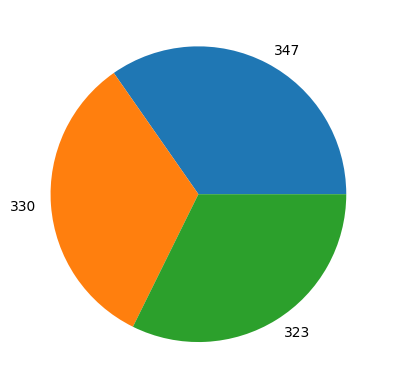

In [9]:
plt.pie(df['review_label'].value_counts(), labels=df['review_label'].value_counts())
plt.show()

In [10]:
x=df["review_text"]
y=df["review_label"]

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# task
#lower case  Hello----> hello
#remove punctuation ., etc
#tokenize plt.text
#remove stopwords
#stemming


In [39]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
stop_words=set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [41]:
stemmer=PorterStemmer()

In [42]:
def clean_text(text):
  text=text.lower()
  text=text.translate(str.maketrans("","",string.punctuation))
  word=text.split()
  word=[stemmer.stem(word) for word in word if word not in stop_words]
  return ' '.join(word)

In [43]:
clean_text("Hello This is an loveble, i eat to love apple in my apple phone i can play game")

'hello lovebl eat love appl appl phone play game'

In [44]:
clean_text("Hello there is a  good girl.")

'hello good girl'

In [45]:
# def clean_text(text):
#   text=text.lower()
#   text=text.translate(str.maketrans('','',string.punctuation))
#   text=text.split()
#   text=[stemmer.stem(word) for word in text if word not in stopwords.words('english')]
#   print(text)
# clean_text("Hello there is a  good girl.")

In [48]:
x=x.apply(clean_text)

In [49]:
x[0]

'good valu money highli recommend use easi use five star'

In [50]:
clean_text(x[0])

'good valu money highli recommend use easi use five star'

In [51]:
x.sample()

,review_text
262,broke two day terribl experi cheap qualiti tot...


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF=TfidfVectorizer()

In [54]:
X=TFIDF.fit_transform(x)
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5980 stored elements and shape (1000, 51)>

In [55]:
X=X.toarray()

In [56]:
X.shape

(1000, 51)

In [57]:
X[:,0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.62464874, 0.44030013, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25623806, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.28131292, 0.        , 0.22602836, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.53912034, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.3702432 ,
       0.        , 0.        , 0.29450705, 0.        , 0.        ,
       0.32653549, 0.        , 0.        , 0.        , 0.68011111,
       0.        , 0.        , 0.27141942, 0.        , 0.25366368,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X,y)

MultinomialNB()

In [59]:
MNB.score(X,y)

0.997

In [60]:
MNB.predict(TFIDF.transform(["product quality is not bad"]))

array(['worst'], dtype='<U5')